# **Predicting Cancer Tumor using support vector Classifier** 


Machine Learning and Data Science in the medical domain deliver solutions to many problems, specifically in the diagnosis sector. This applies to categorizing diseases, relating the disease to the cause, identifying the root cause, etc.


Cancer classification is one area where ML can deliver a robust predictive model based on given observations

to identify the cancer possibility. In this article, we will develop our Support Vector Classifier model to predict

the presence of malignant (cancer-causing cells) or benign cells.


**Problem Understanding**

Breast cancer is the most common malignancy (Malignant tumor) among women, accounting for women's second chief cause of cancer death. Breast Cancer occurs due to abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer. Tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound, and biopsy are commonly used to diagnose breast cancer.


# **Let's Begin**

First of all we will install all the dependecies and libraries that we are going to use

In [ ]:
pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6fc5cb4e3ff601394af15bef4829350134ddbda830a170fea2aaa3ffb594d884
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


Libraries needed:


1.   Numpy: for mathematical purposes and for data cleaning
2.   Pandas: to create a dataframe which can be understood by our classifier 
3.   Matplotlib: to plot a graph from given data and to visualise everything.







In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC
import pandas as pd

Load the breat cancer dataset from the sklearn datasets.

In [ ]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

here we will create a pandas dataframe from the given dataset so that we can perform data cleaninig effeicntly.

In [ ]:

cancer_features=pd.DataFrame(data.data, columns=data.feature_names)
cancer_features.insert(1,'diagnosis',data.target)
cancer_features

,mean radius,diagnosis,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,0,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,0,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,0,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,0,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,0,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,0,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,0,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,0,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,0,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


So we can see that the dataset has a dimension of 569 x 32 with each instance as label 'M'=Malignant or 'B'=Benign 

#**Data Visualization**

In this dataset, there is a highly non-linear relation between the features, and hence a robust classifier is needed to make any prediction based on it. We have used RadViz (a non-linear multi-dimensional visualization library) to visualize the dataset of every feature.

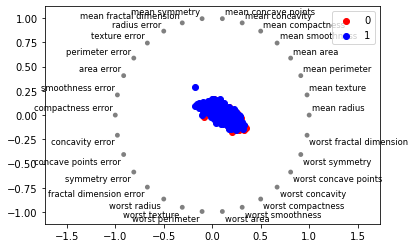

In [ ]:
from pandas.plotting import radviz
radviz(cancer_features,"diagnosis",color=['red','blue'])

#**Data Preprocessing for loadbreastcancer dataset**

Here we are assigning numerical values to categorical data (target labels): We can use a label encoder to define the target values in this task. The label encoder can be imported using the command, from

sklearn.preprocessing import LabelEncoder. Once it is imported, an instance of the label encoder

can be created, and the target attribute column (diagnosis) can be fitted

Also, data standardization can be performed, which will orient the data and a zero mean and unit standard deviation

In [ ]:
from sklearn.preprocessing import LabelEncoder
li_classes=[data.target_names[0],data.target_names[1]]
le=LabelEncoder()
target_encoded=pd.Series(data.target)
target=le.fit_transform(target_encoded)

Some redundant columns can be dropped from training set as they provided no valuable imnformation in this problem

In [ ]:
cancer_features.drop(['diagnosis','mean perimeter','mean compactness','mean area', 'mean radius'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
STD=StandardScaler()
cancer_features=STD.fit_transform(cancer_features)


#**Model Formation**

Kernelized support vector machines are robust methods of mapping a highly non-linear dataset to a relatively linear way to classify any dataset instance. Hence we will be using SVM for this task to achieve better performance.

Using the above dataset, we can call the
train test split module from the 'sklearn.nodel selection library to divide the dataset into training and testing datasets. The splitting can be done in a 75.25 ratio

Also, we import Support Vector Callsifier from SVM modeule in sklearn and create a model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(cancer_features,target,test_size=0.25, random_state=61)

The follwing paramters are passed in the SVC model

**Regularizer, C**: By default, it is 1. This parameter is given a positive float quantity, which will inverselyrelate the regularization's strength to the quantity.

**Kernel**: The kernel transforms the data into a different form. The purpose of the kernel is to transform such that the classifier can easily classify it. The most preferred kernel is the 'rbf because it can account for non-linearity.


In [ ]:
model=SVC(C=1.2,kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# **Performance Evaluation of the SVM model**
We have solved a classification problem, so the model can be evaluated on several classification evaluation metrics like accuracy score, confusion matrix, roc curve ,etc.

In [ ]:
print('accuracy:', accuracy_score(y_test,y_pred))
print('precision: ', precision_score(y_test,y_pred))
print('recall: ', recall_score(y_test,y_pred))
print('f1-score: ', f1_score(y_test,y_pred))
print('area under curve(auc): ',roc_auc_score(y_test,y_pred))


accuracy: 0.986013986013986
precision:  0.978021978021978
recall:  1.0
f1-score:  0.9888888888888888
area under curve(auc):  0.9814814814814815


Here we have a high accuracuy of 98% for given data.

##**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


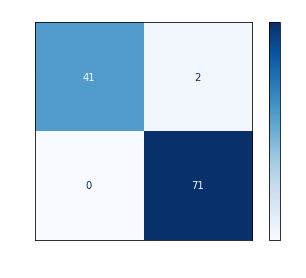

In [ ]:
from sklearn.metrics import plot_confusion_matrix
color = 'white'
matrix = plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()